**Netflix Content Analysis and Insights**

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

Load the dataset

In [ ]:
df = pd.read_csv('/content/netflix1.csv')
# Display the first few rows of the dataset
print(df.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.shape

(8790, 10)

Drop Duplicates

In [ ]:
df = df.drop_duplicates()
print(df.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

Distribution of content type on netflix

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


<ipython-input-8-591862e5a0e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette=['#312c18','#4c0308'])


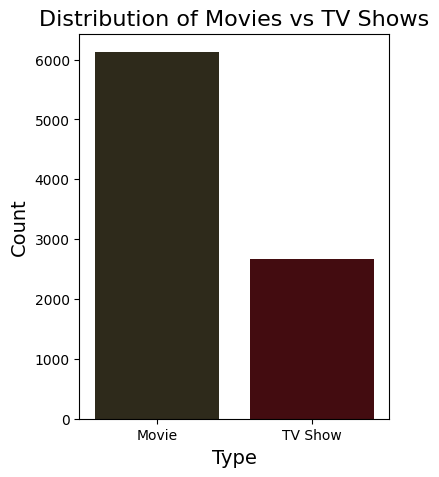

In [ ]:
freq = df['type'].value_counts()
plt.figure(figsize=(4,5))
sns.barplot(x=freq.index, y=freq.values, palette=['#312c18','#4c0308'])
plt.title('Distribution of Movies vs TV Shows', fontsize=16)
plt.xlabel('Type', size=14)
plt.ylabel('Count', size=14)
plt.xticks(rotation=0)
plt.show()


Ratings


In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [ ]:
df[['rating', 'type']].isnull().sum()

,0
rating,0
type,0


In [ ]:
ratings_counts = df.groupby(['type','rating']).size().reset_index(name='count')
print(ratings_counts)

       type    rating  count
0     Movie         G     41
1     Movie     NC-17      3
2     Movie        NR     75
3     Movie        PG    287
4     Movie     PG-13    490
5     Movie         R    797
6     Movie     TV-14   1427
7     Movie      TV-G    126
8     Movie     TV-MA   2062
9     Movie     TV-PG    540
10    Movie      TV-Y    131
11    Movie     TV-Y7    139
12    Movie  TV-Y7-FV      5
13    Movie        UR      3
14  TV Show        NR      4
15  TV Show         R      2
16  TV Show     TV-14    730
17  TV Show      TV-G     94
18  TV Show     TV-MA   1143
19  TV Show     TV-PG    321
20  TV Show      TV-Y    175
21  TV Show     TV-Y7    194
22  TV Show  TV-Y7-FV      1


Distribution of ratings by type of content

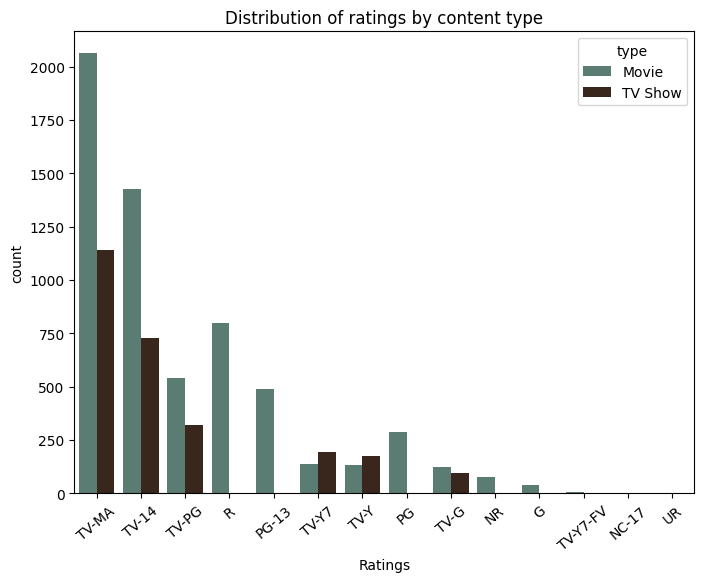

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='rating', hue= 'type', order=df['rating'].value_counts().index, palette=['#558274', '#3e2417'])
plt.title('Distribution of ratings by content type')
plt.xlabel('Ratings')
plt.ylabel('count')
plt.xticks(rotation = 40)
plt.show()

convert date_added column into datetime

In [ ]:
print(df['date_added'].dtypes)

object


In [ ]:
df['date_added']= pd.to_datetime(df['date_added'])
print(df['date_added'].head())

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]


Monthly release of content type

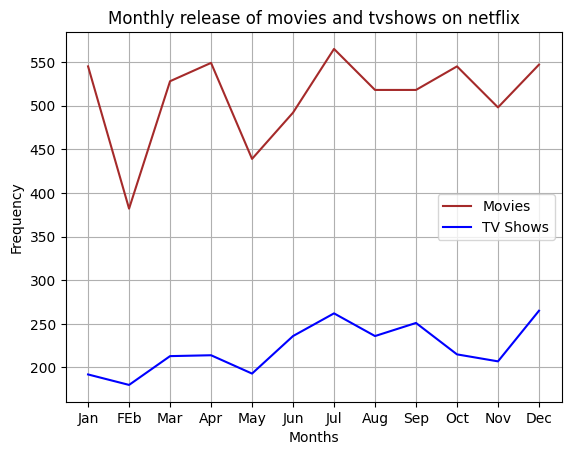

In [ ]:
df['month'] = df['date_added'].dt.month
monthly_movie_release= df[df['type'] =='Movie']['month'].value_counts().sort_index()
monthly_tvshows_release = df[df['type']== 'TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label ='Movies', color ='brown')
plt.plot(monthly_tvshows_release.index, monthly_tvshows_release.values, label ='TV Shows', color ='blue')
plt.title('Monthly release of movies and tvshows on netflix')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.xticks(range(1,13), ['Jan', 'FEb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.show()


Yearly release of content type

In [ ]:
df['Year'] = df['date_added'].dt.year

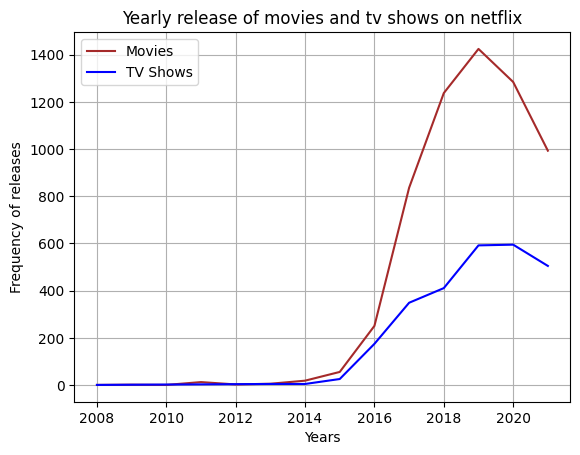

In [ ]:
yearly_movie_release = df[df['type']=='Movie']['Year'].value_counts().sort_index()
yearly_tvshows_release = df[df['type']=='TV Show']['Year'].value_counts().sort_index()
plt.plot(yearly_movie_release.index,yearly_movie_release.values,label ='Movies', color ='brown')
plt.plot(yearly_tvshows_release.index,yearly_tvshows_release.values,label ='TV Shows', color ='blue')
plt.title('Yearly release of movies and tv shows on netflix')
plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.legend()
plt.grid(True)

Top 10 directors with most titles

In [ ]:
director_count = df['director'].value_counts().head(10)
print(director_count)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64


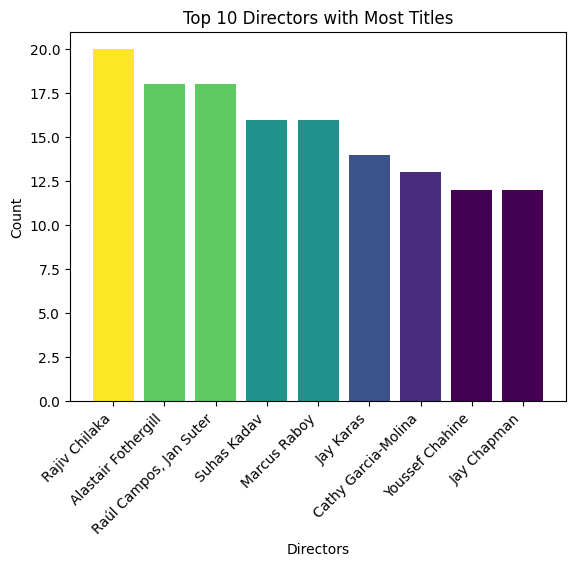

In [ ]:
directors=df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:10]
norm = plt.Normalize(directors['count'].min(), directors['count'].max())
colors = plt.cm.viridis(norm(directors['count']))
plt.bar(directors['director'], directors['count'], color = colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 10 Directors with Most Titles')
plt.show()

Most Common Genres

In [ ]:
df_exp=df['listed_in'].str.split(',').explode().str.strip()
genre_count = df_exp.value_counts()
print(genre_count)

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows             

In [ ]:
genre_counts = Counter(df_exp)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
top_genres = genre_df.nlargest(10, 'Count')
print(top_genres)

                       Genre  Count
11      International Movies   2752
9                     Dramas   2426
8                   Comedies   1674
2     International TV Shows   1349
0              Documentaries    869
28        Action & Adventure    859
4                  TV Dramas    762
10        Independent Movies    756
7   Children & Family Movies    641
18           Romantic Movies    616


"plt.figure(figsize=(8,6))\nsns.barplot(x=top_genres.index, y= top_genres.values, palette= 'viridis')\nplt.title('Top 10 most common genres')\nplt.xlabel('Genres')\nplt.ylabel('Count')\nplt.xticks(rotation =45)\nplt.show()"

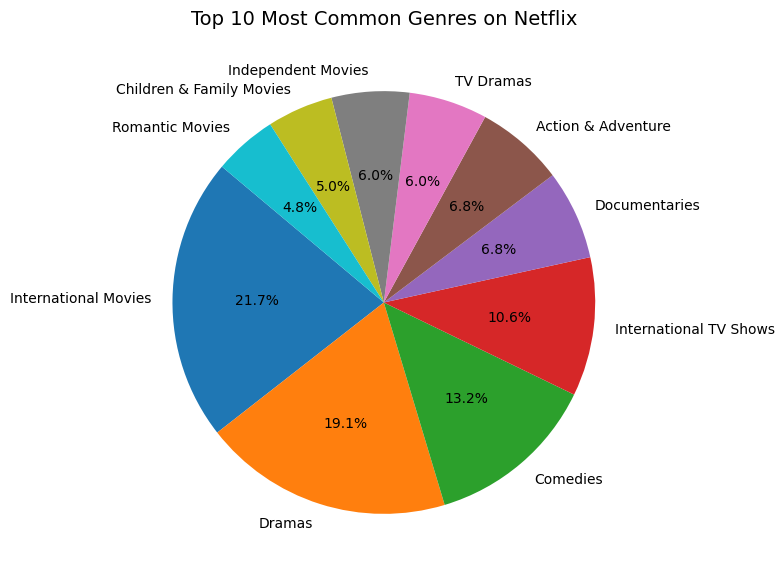

In [ ]:
plt.figure(figsize=(6, 7))
plt.pie(top_genres['Count'], labels=top_genres['Genre'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Top 10 Most Common Genres on Netflix", fontsize=14)
plt.axis('equal')
plt.show()

Movie titles

In [ ]:
all_titles = "".join(df['title'].dropna())

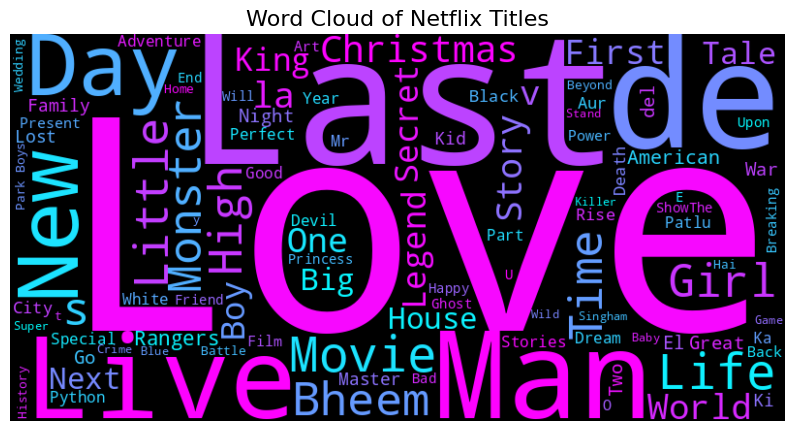

In [ ]:
wordcloud = WordCloud(
    width=800, height=400,
    colormap='cool',
    max_words=100
).generate(all_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes
plt.title("Word Cloud of Netflix Titles", fontsize=16)
plt.show()

Top 10 countries with type of content




<ipython-input-38-85ed29e3e0ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


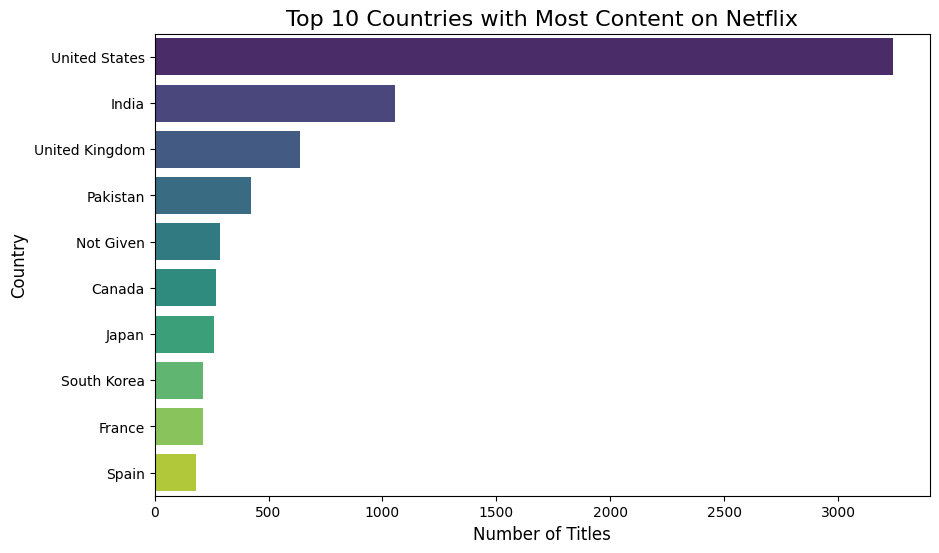

In [ ]:
country_counts = df['country'].value_counts().head(10)  # Get top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 Countries with Most Content on Netflix", fontsize=16)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()